# Final Project by Zach Cohen, Corey Feldman, David Gurmet

**Background Information**:

We are nearing the 10-year anniversary of the Great Financial Crisis (GFC). Although many have spent the following years thinking about the root causes of the crisis - pointing to the Federal Reserve’s policy choices, the “housing bubble” or the irresponsible behavior by the “evil” wall street financiers – doing so inherently misses the forest for the trees. The GFC was one crisis in a long list of financial crises and banking system meltdowns. In other words, the issues raised by many after the crisis are only what exposed an underlying flawed system of money and banking. Imagine you have a building with a foundation that is inherently unstable, and every time there is some sort of storm, the building comes crashing down. Attempting to stop storms from occurring is obviously not the right approach – time should be spent fixing the foundation so that it will be built to withstand the storms bound to come. In this analogy, the “housing crisis” was just another storm that once more took down the poorly built building.

Admittedly, this is an abstract perspective on a very concrete issue. As such, we will clarify exactly why the system naturally has cracks that make it susceptible to repeated failure. As Mervyn King – former Governor of the Bank of England – has made very clear, the system of money and banking is alchemic. Banks take safe, liquid and short-term deposits and subsequently create risky, illiquid and long-term assets. The more this is done, the riskier and shakier the entire banking system becomes. In this context: 1) the Great Depression was prolonged by the fact that when many went to get their money from their banks at the same time, it was no where to be found; 2) Lehman’s collapse and the depth of the GFC was a direct result of “depositors” (in a simple analysis) not knowing exactly where their money was and the extent of the risk that was being taken with it. In both cases (and to some extent in every banking system meltdown that has occurred over the past 200+ years) banks did not have enough of a “capital cushion” to protect those depositors from the losses on risky, illiquid, and long terms assets on their balance sheet.

Going back to our building analogy, this capital cushion is one of the keys to filling the cracks in the foundation. Consider the extreme where Banks only hold assets funded by capital – then all asset losses can be ‘written off’ with capital losses. However, in the other extreme, where Banks hold no capital and fund all assets through debt – importantly deposits – any asset loss would render that bank insolvent (as ultimately happened to Lehman). 

One metric to measure the risk that we have been discussing quantitively is the Leverage ratio (LR) - the ratio of total assets to capital. This is broadest form of quantifying the level of alchemy in which a given bank is engaging. Before the GFC, many banks had LR’s upwards of 40x – in other words every $40 of assets was backed by a measly single dollar of capital. Any drawdown of more than 3% across all assets would lead to insolvency. 

While the leverage ratio is an important broad metric, relying solely on it is a naïve means of gauging the risk created by banks. This is obvious because the assets on the balance sheet of bank are heterogeneous – some are safer, some are riskier, some are more liquid, and others less so (with much overlap between the two). Thus, it is important to view leverage ratios in context. To do so, one can adjust for both risk and liquidity by either weighting assets based on risk, or only accounting for assets that are not “highly liquid”, like reserves at a central bank or cash. These ratios can be considered the **Risk Adjusted Leverage Ratio** and the **Liquidity Adjusted Ratio** respectively.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline


Important note on the data cleaning that took place in order to make this project possible: We spent quite a bit time organizing the data so that it would be in a format that allowed us to conduct the analysis that follows. We downloaded the data in bulk from the European Central Bank, and did not touch it in Excel. We wanted to ensure that we were practicing and building our data-handling skills in python. The data was formatted in a way such that none of the individual countries data were seperate - which we required. As such, we spent a majority of time thinking about a way to create separate country data-frames, which we could then use to illustrates the certain calculations we wanted to repeat for each country. We spent time defining the code to complete both of these processes in an efficient manner. Once we created such a code we were able to apply it to each country.

In [6]:
gbd = pd.read_csv("/Users/zacharycohen/Desktop/DATA BOOTCAMP/gbd.csv" , skiprows=[0,1,3] , index_col=0 , na_values="-")
#Skipped row 0 because it had source information that was not applicable 
#Skipped row 1 because it had coded information
#Skipped row 3 because it was not necessary to our project
#We indexed by year 
#We changed NA to "-" for computational purposes later on in the project 

In [7]:
gbd.head()

,"Austria, TOTAL ASSETS, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Austria, Liquid assets - TOTAL UNADJUSTED LIQUID ASSETS, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Austria, Risk-weighted assets [% of total assets], Percent","Austria, Deposits, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Austria, Capital, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Belgium, TOTAL ASSETS, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Belgium, Liquid assets - TOTAL UNADJUSTED LIQUID ASSETS, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Belgium, Risk-weighted assets [% of total assets], Percent","Belgium, Deposits, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Belgium, Capital, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro",...,"Slovenia, TOTAL ASSETS, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Slovenia, Liquid assets - TOTAL UNADJUSTED LIQUID ASSETS, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Slovenia, Risk-weighted assets [% of total assets], Percent","Slovenia, Deposits, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Slovenia, Capital, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Slovakia, TOTAL ASSETS, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Slovakia, Liquid assets - TOTAL UNADJUSTED LIQUID ASSETS, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Slovakia, Risk-weighted assets [% of total assets], Percent","Slovakia, Deposits, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro","Slovakia, Capital, Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro"
Period\Unit:,[Thousands of Euro],[Thousands of Euro],[Percent ],[Thousands of Euro],[Thousands of Euro],[Thousands of Euro],[Thousands of Euro],[Percent ],[Thousands of Euro],[Thousands of Euro],...,[Thousands of Euro],[Thousands of Euro],[Percent ],[Thousands of Euro],[Thousands of Euro],[Thousands of Euro],[Thousands of Euro],[Percent ],[Thousands of Euro],[Thousands of Euro]
2018Q2,972449361,137750484,48.599,695971832,NaN,1043423795,150466175,37.259,787866622,31478633,...,42439325,9170156,61.0117,35990564,1192858,78860129,12681659,53.5917,63298888,1937584
2018Q1,966907280,139935016,48.2735,700734973,NaN,1029025440,147211689,37.0818,780052329,31496453,...,42018545,8996210,60.6256,35505895,1188106,77761963,13020490,53.5237,62168643,1937588
2017Q4,949283098,129916778,48.4559,683585139,NaN,993775859,148244981,37.5394,736069787,31495531,...,41749823,9252664,59.6838,35453871,1187516,77632336,13802923,50.7036,61543416,1937583
2017Q3,950841361,127715427,48.3205,680058354,NaN,1043683053,163916275,35.8695,780914447,31727556,...,41036944,9264320,59.0259,34845002,1186710,76628641,13635797,51.4477,60893504,1914513


In [ ]:
gbd.shape

In [16]:
gbd.columns = [i.replace(", Not specified, All exposures, Carrying amount, Closing balance sheet/Positions/Stocks, All currencies, Euro", '') for i in gbd.columns]
#We used a list comprehension to iterate over all the column titles and delete the extraneous words

In [ ]:
gbd.head()
#checking to see if the code above worked properly

**Our Project**:

Though these metrics are normally used to analyze individual banks, we believed it would be both interesting and insightful to use these metrics to analyze banking systems in aggregate. More specifically, (partly due data accessibility) we thought analyzing the various countries that comprise the European Union would be a worthwhile endeavor. As such, we gathered data from the European Central Bank that aggregates the balance sheets of domestic banks and branches/subsidiaries of foreign banks in each EU country. From there we calculated the three ratios mentioned earlier for each country: **Leverage Ratio, Liquidity Adj. Leverage Ratio, and Risk Adj Leverage Ratio** (data permitting – for some countries this data is still confidential). Not only did we gather recent data points, but also some level of historical data – which allows us to analyze the data not only cross-sectionally but also as a time series, to see how these ratios have evolved. Once we were able to organize and manipulate the data to our liking, we focused on illustrating the data in a way that allowed us to add some qualitative color. We provide these insights throughout the rest of this notebook: 


In [ ]:
#The purpose of this code is to get our data seperated by country 
#This then allows us to go and add columns that are products of the existing columns

x = [] #create empty list
for i in gbd.columns.tolist(): #use to list so we can cycle through easier
    if i.find('Belgium') == 0: #allows us to do it by country
        x.append(i) #create this list
Belgium = gbd[x] #turn it into a series
Belgium = Belgium.drop(axis=0, labels = r"Period\Unit:") #we are dropping an object in our list
#we used r before period unit because the r tells python to ignore the unicode
Belgium = Belgium.dropna(subset=["Belgium, Capital"]) #dropping all n/a in this column
Belgium = Belgium.astype(float) #making eveyrthing a float so we can do formulas with the data
Belgium["Leverage Ratio"] = Belgium["Belgium, TOTAL ASSETS"] / Belgium["Belgium, Capital"] #leverage ratio formula
Belgium["Liquidity Adj Leverage"] = ((Belgium["Belgium, TOTAL ASSETS"] - Belgium["Belgium, Liquid assets - TOTAL UNADJUSTED LIQUID ASSETS"]) / Belgium["Belgium, Capital"]) #liquidity formula
Belgium["Risk Adj Leverage"] = (((Belgium["Belgium, TOTAL ASSETS"])*((Belgium["Belgium, Risk-weighted assets [% of total assets], Percent"])/100))/ Belgium["Belgium, Capital"]) #risk formula
Belgium #showing all the changes in the dataframe

In [11]:
#This code helps us format each column top remove spaces, charachters, and extra wors
l1  = [i.replace(", TOTAL ASSETS" , "") for i in gbd.columns]
l2 = [i.replace(", Liquid assets - TOTAL UNADJUSTED LIQUID ASSETS" , "") for i in l1]
l3 = [i.replace(", Risk-weighted assets [% of total assets], Percent" , "") for i in l2]
l4 = [i.replace(", Deposits" , "") for i in l3]
Countrylist = [i.replace(", Capital" , "") for i in l4]

In [ ]:
#This function helped us remove duplicates, since we had 5 occurences of the same country but we only want a list of each country mentioned onee
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list
Remove(Countrylist)

In [13]:
#This code is the exact code as above created into a function for re-usability purposes
#This allowed us to call it for every country 
#we use the variable country as a placeholder 
def table_maker(country):
    x = []
    for i in gbd.columns.tolist():
        if i.find(country) == 0:
            x.append(i)
    c_data = gbd[x]
    c_data = c_data.drop(axis=0, labels = r"Period\Unit:")
    c_data = c_data.sort_index(axis = 0 , ascending = True)
    c_data = c_data.dropna(subset=[str(country) + ", Capital"])
    c_data = c_data.astype(float)
    c_data["Leverage Ratio"] = c_data[str(country) + ", TOTAL ASSETS"] / c_data[str(country) + ", Capital"]
    c_data["Liquidity Adj Leverage"] = ((c_data[str(country) + ", TOTAL ASSETS"] - c_data[str(country)+ ", Liquid assets - TOTAL UNADJUSTED LIQUID ASSETS"]) / c_data[str(country)+", Capital"])
    c_data["Risk Adj Leverage"] = (((c_data[str(country) + ", TOTAL ASSETS"])*((c_data[str(country)+", Risk-weighted assets [% of total assets], Percent"])/100))/ c_data[str(country) + ", Capital"])
    return c_data

In [17]:
#This shows the effect of table maker
#We ran this code before every country to check that it worked
Belgium = table_maker("Belgium")
Belgium

,"Belgium, TOTAL ASSETS","Belgium, Liquid assets - TOTAL UNADJUSTED LIQUID ASSETS","Belgium, Risk-weighted assets [% of total assets], Percent","Belgium, Deposits","Belgium, Capital",Leverage Ratio,Liquidity Adj Leverage,Risk Adj Leverage
2014Q4,9.963415e+08,NaN,35.1437,692030807.0,28659658.0,34.764599,NaN,12.217566
2015Q1,1.067934e+09,NaN,33.9194,737131827.0,28674397.0,37.243458,NaN,12.632757
2015Q2,1.018988e+09,NaN,33.7182,738053724.0,28576685.0,35.658035,NaN,12.023248
2015Q3,1.008150e+09,NaN,34.1130,731931100.0,28562378.0,35.296446,NaN,12.040676
2015Q4,9.702868e+08,NaN,35.6017,701665067.0,28604424.0,33.920865,NaN,12.076404
2016Q1,1.012618e+09,NaN,34.6217,729117641.0,28609574.0,35.394390,NaN,12.254140
2016Q2,1.039449e+09,NaN,34.5362,728019368.0,29936865.0,34.721371,NaN,11.991442
2016Q3,1.029688e+09,159943562.0,34.7354,730381648.0,29939637.0,34.392124,29.049923,11.946242
2016Q4,1.021889e+09,164648200.0,36.1801,724533803.0,31528978.0,32.411096,27.188973,11.726367
2017Q1,1.036625e+09,163341829.0,35.5867,758751878.0,31529600.0,32.877836,27.697249,11.700137


<h3>**Note: Some countries data is not released, hence the blank charts in a few places.**<h3>

# Belgium


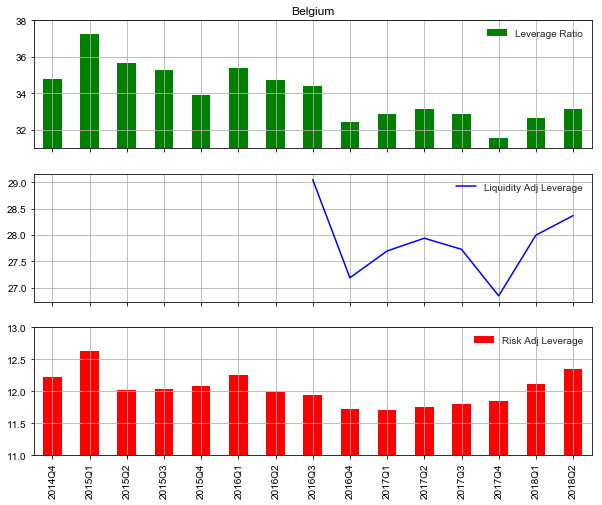

In [18]:
#we used the same graph format for each county
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
#we created 3 figures that share an X axis 
plt.style.use('seaborn-whitegrid') #we used seaborn-whitegrid style
Belgium["Leverage Ratio"].plot.bar(legend = True,color='green', title='Belgium', ax=ax[0], ylim = [(round((min(Belgium["Leverage Ratio"]))-.5)) , (round((max(Belgium["Leverage Ratio"]))+.5))])
#we set the y limit to minuimim of the countries leverage ratio rounded down and the maximum of the country leverage ratio rounded up
Belgium['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
#simple graph but we only have a bit of data
Belgium['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(Belgium['Risk Adj Leverage']))-.5)) , (round((max(Belgium['Risk Adj Leverage']))+.5))])
#we set the y limit to minuimim of the countries risk adjusted leverage rounded down and the maximum of the country's risk adjusted leverage rounded up

#we repeated this process for almost all countries in the E.U


**Belgium**

Belgium has de-levered significantly since the crisis and now has 14x leverage compared to 30x back in 2008. A similar trend can be seen when adjusting to risk. The major difference between risk adjusted leverage and generic leverage illustrates that though the balance sheet of the Belgium Banking System is large (Over 1 Tr Euro’s worth of assets to be exact), much of those assets aren’t necessarily _‘risky’*._ Belgium’s risk weighted assets as a percentage of total assets is less than 40%. 

_*** Important note:** We purposely put risky in quotes because it is vital to understand that regardless of whether we believe we can assign certain values of risk, there is some level of uncertainty that we will never be able to account for. This is the exact reason why it would be equally naïve to look solely at the risk weighted leverage ratio. One extreme case that illustrates this is the fact that many government bonds receive a weighting of 0. If there is some one-off event that leads to doubt of one of these governments ability to repay its debt (certainly a possible outcome) than suddenly these assets have some (arguably sizeable) level of risk. As such, the Leverage Ratio and Risk-Weighted Leverage Ratios are only informative in the context of each other._


# Cyprus


In [ ]:
country = table_maker("Cyprus")
country

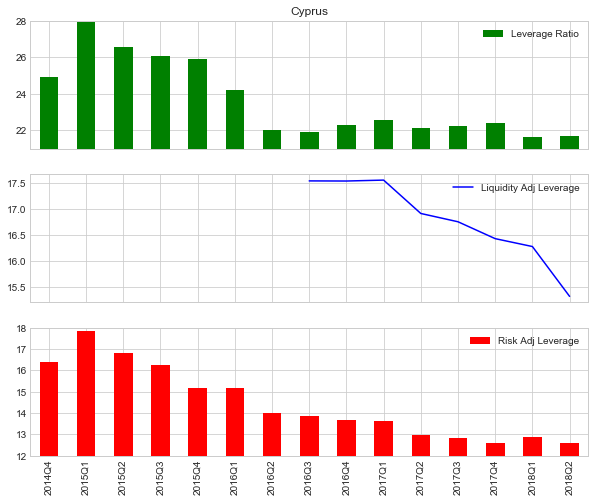

In [21]:
#Cyprus 
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title = 'Cyprus', legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Cyprus**

Similarly, Cyprus has seen leverage in its banking system come down significant. One interesting point to note here is the spike in late 2012 – which coincided with the Greek/EA debt crisis – when much of its capital was wiped out.

# Czech Republic

In [ ]:
country = table_maker('Czech Republic')
country

In [ ]:
#Czech Republic
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Czech Republic',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Czech Republic**

Although Leverage has recently trended higher, the data tells us that on a risk adjusted basis, the Czech Republic Banking system is in a relatively resilient position.


# Denmark

In [ ]:
country = table_maker('Denmark')
country

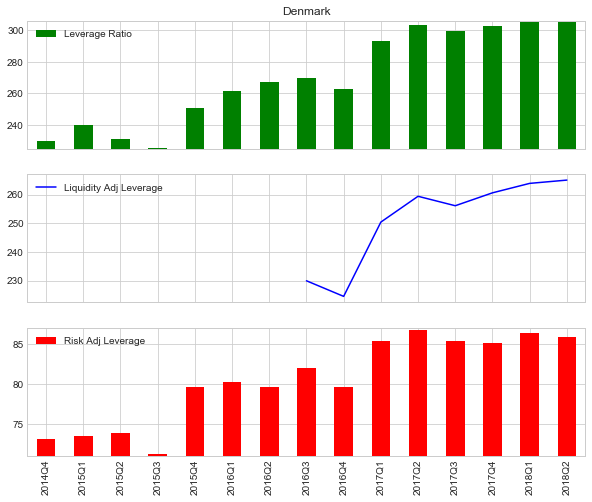

In [25]:
#Denmark
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Denmark',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Denmark**

Denmark has seen a consistent trend lower in leverage on a broad and risk-adjusted basis.

# Estonia

In [ ]:
country = table_maker('Estonia')
country

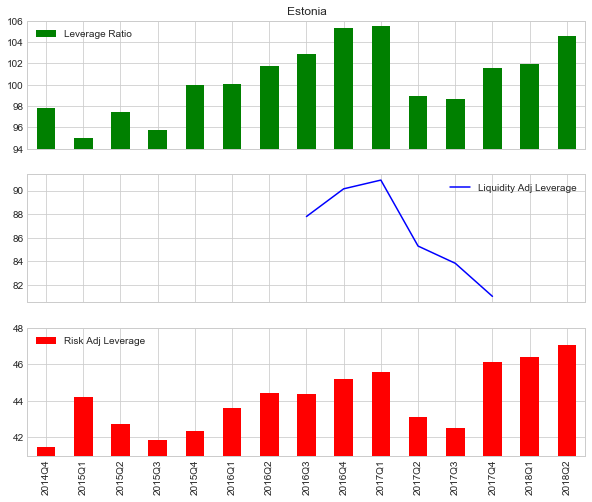

In [27]:
#Estonia
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Estonia',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Estonia** 

Estonia has not only seen a trend to a more capitalized system, but also less than 10x leverage in the most recent quarter, which is indicative of a system that would be able to withstand shocks.


# Spain

In [ ]:
country = table_maker('Spain')
country

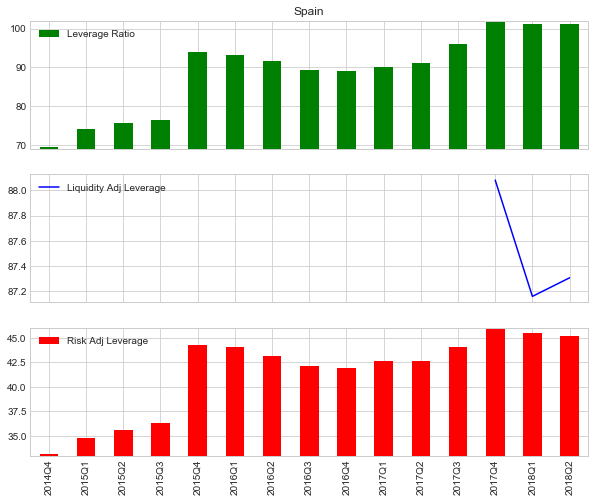

In [29]:
#Spain
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Spain',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Spain**

Spain also saw a significant contraction in leverage following the Euro Area debt crisis and has not seen a significant rebound since.

# Finland

In [ ]:
country = table_maker('Finland')
country

In [ ]:
#Finland
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Finland',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Finland**

Finland is a unique and interesting case. Not only does it have the highest leverage amongst sampled countries, it has also seen a reversal in its trend of falling leverage on a risk-adjusted basis. These two developments illustrate the seemingly fragile nature of Finland’s banking system. A 12% loss across risky assets would wipe out its capital base, necessitating a recapitalization of the entire system.

# France

In [ ]:
country = table_maker('France')
country

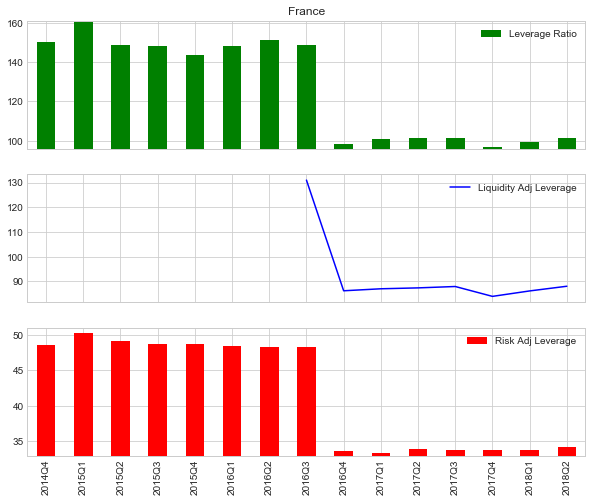

In [33]:
#France
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='France',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**France**

France has seen the same downward trend toward resiliency consistent with other large countries in the EU.

# United Kingdom

In [ ]:
country = table_maker('United Kingdom')
country

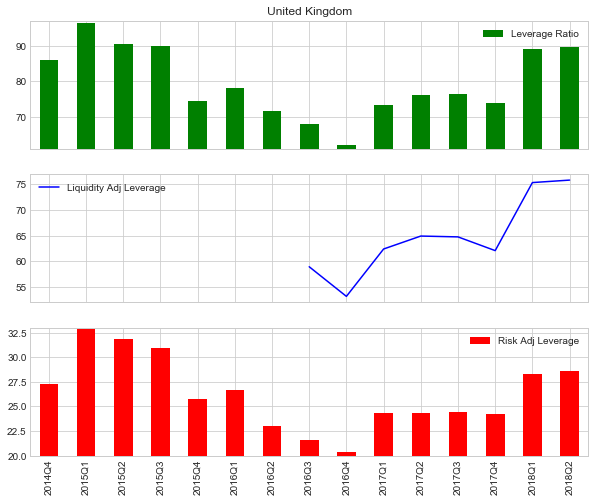

In [35]:
#United Kingdom
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='United Kingdom',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**United Kingdom**

Like France and the other large countries in the EU, the UK has seen the same downward trend toward resiliency.


# Greece 

In [ ]:
country = table_maker('Greece')
country

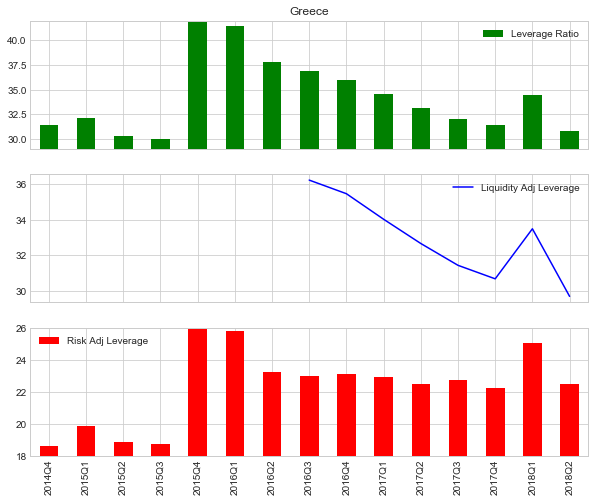

In [37]:
#Greece
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Greece',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Greece**

Greece’s banking system is certainly the most fascinating. The charts above illustrate the drastic nature of the “Greek” crisis. Greece’s entire system went insolvent – in other words, banks owed more than they could provide. This – in part – exacerbated the breadth and depth of the crisis. Although many reforms have been made since, there is still nearly the same amount of leverage now as there was right before the crisis. Couple this with the fact that Risk-Weighted Assets make up 73% of total assets, and seemingly Greece still does not have the greatest outlook. The hope is that any crisis, like that which occurred in Greece, will spark the necessary response to ensure that they are only one-time events. It looks like it may take another crisis for Greece to learn its lesson...


# Croatia

In [ ]:
country = table_maker('Croatia')
country

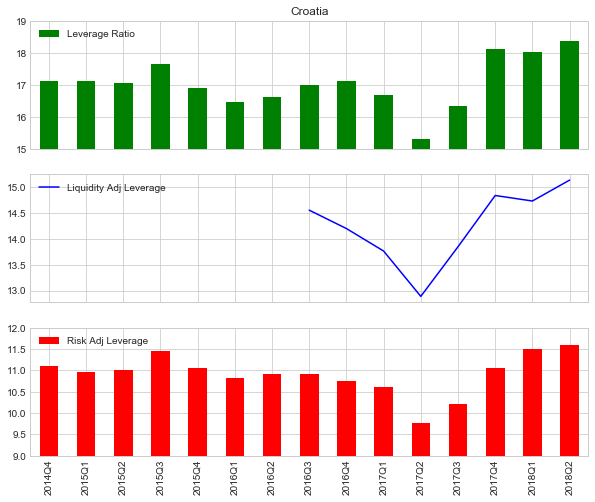

In [39]:
#Croatia
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Croatia',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

# Ireland

In [ ]:
country = table_maker('Ireland')
country

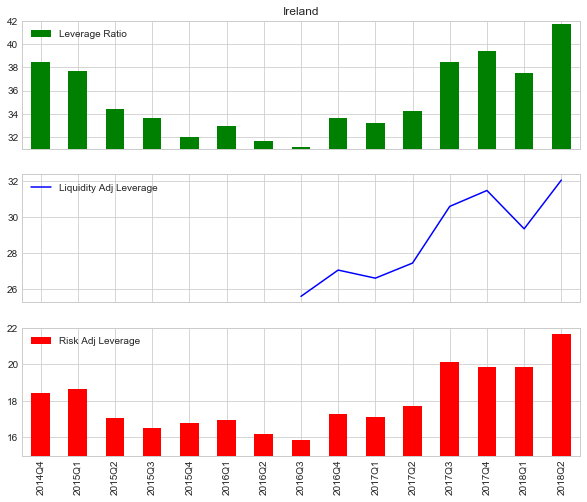

In [41]:
#Ireland
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Ireland',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Ireland**

Ireland is now successfully on its way to a more resilient system. It is interesting to note the incredibly high leverage that existed before the GFC (nearly 30x!). Not surprisingly, Irish banks were some of the banks that suffered the most.

# Italy

In [ ]:
country = table_maker('Italy')
country

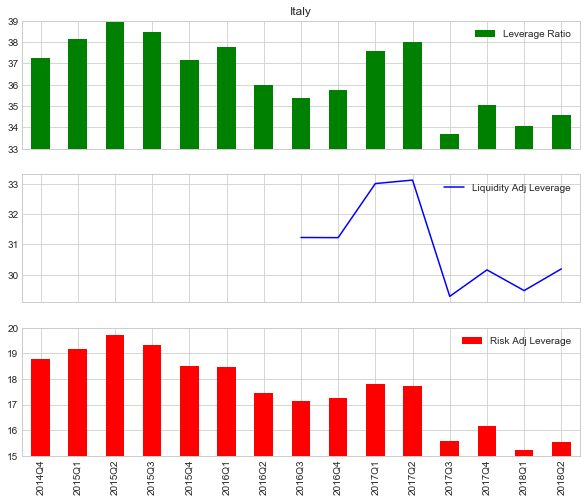

In [43]:
#Italy
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Italy',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Italy**

The data for Italy is far and away the most relevant today. As illustrated in the chart, Leverage has recently begun to climb back higher in Italy. This is important as recent rhetoric around political developments, including the possibility of leaving the EU sparked uncertainty that has now made its way to the banking system. As of now, Banks seem capitalized enough to withstand adverse scenarios, but the recent trend is a dangerous one that might jeopardize the resilience of the system moving forward.

# Lithuania

In [ ]:
country = table_maker('Lithuania')
country

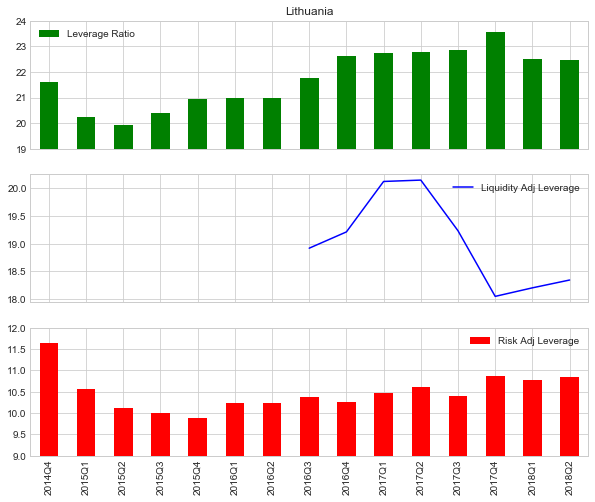

In [45]:
#Lithuania
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Lithuania',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

# Luxembourg

In [ ]:
country = table_maker('Luxembourg')
country

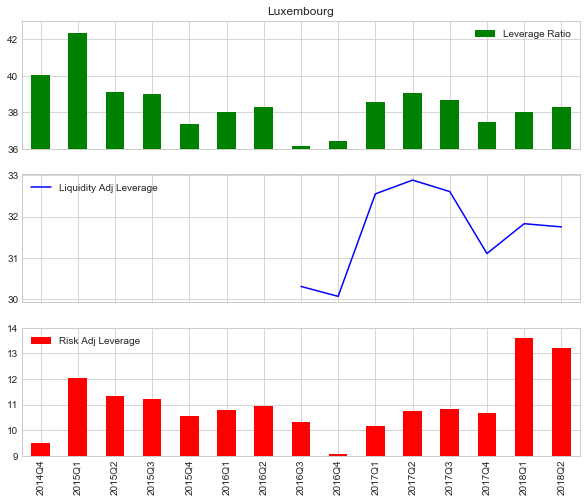

In [47]:
#Luxembourg
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Luxembourg',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

# Latvia

In [ ]:
country = table_maker('Latvia')
country

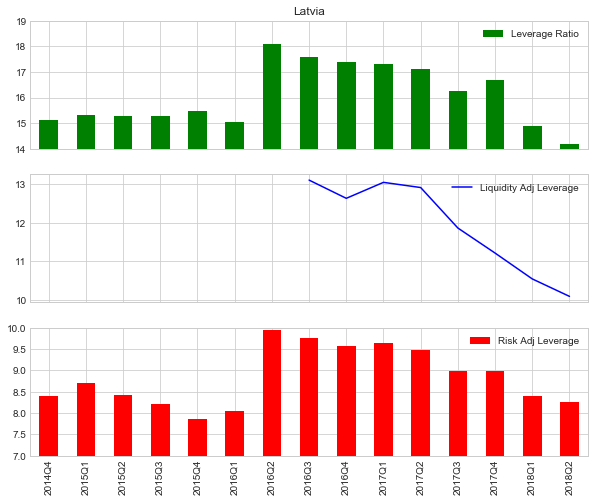

In [49]:
#Latvia
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Latvia',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

# Malta

In [ ]:
country = table_maker('Malta')
country

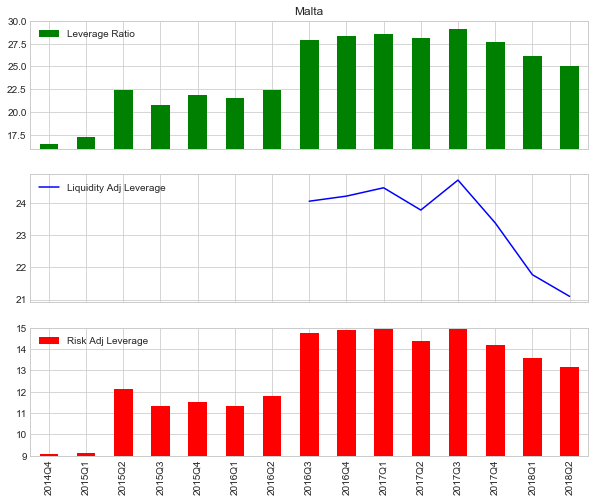

In [51]:
#Malta
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Malta',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

# Netherlands 

In [ ]:
country = table_maker('Netherlands')
country

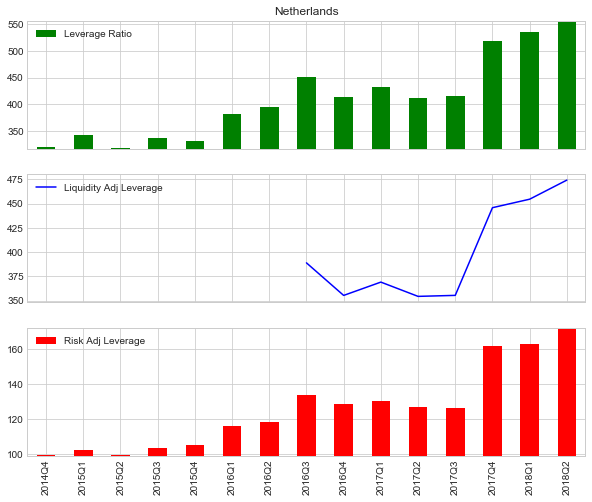

In [53]:
#Netherlands
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Netherlands',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Netherlands**

Though the Netherlands, like other major players in the EU, has seen a downward trend in leverage. It is still one country that remains fairly levered on a relative basis, with leverage still above 15x.


# Poland 

In [ ]:
country = table_maker('Poland')
country

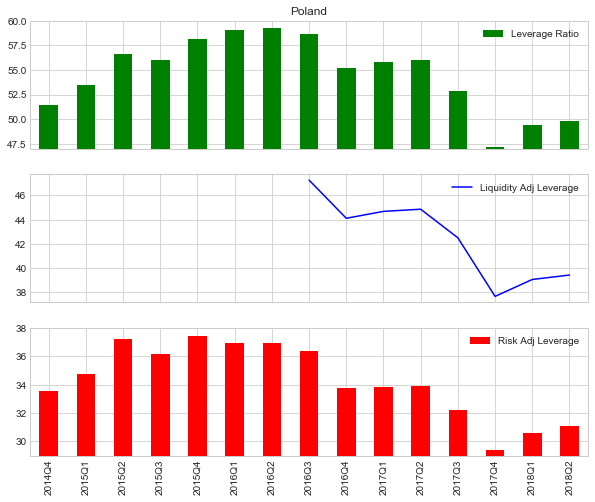

In [55]:
#Poland
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Poland',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Poland**

Poland is unique in that its banking system has not been over levered in this data sample. As such – though it has trended sideways – it remains a fairly resilient system.

# Portugal 

In [ ]:
country = table_maker('Portugal')
country

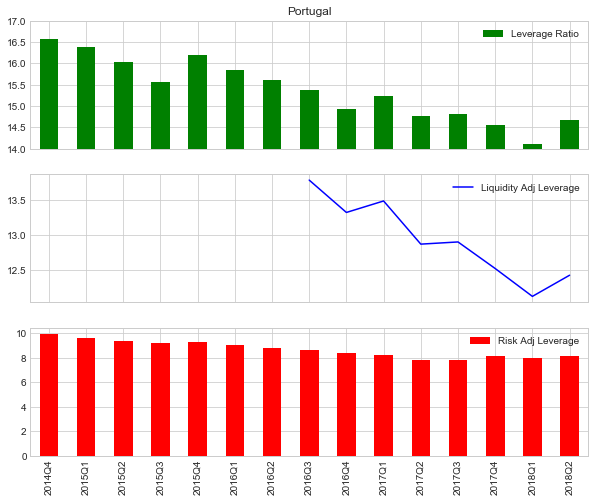

In [57]:
#Portugal 
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Portugal',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red')

**Portugal**

Portugal has seen both a sharp decline in leverage as well as reliance on risky assets. Both risk-weighted assets share of total assets and leverage – on both a broad basis and risk adjusted basis – have come down significantly in the past decade.

# Romania 

In [ ]:
country = table_maker('Romania')
country

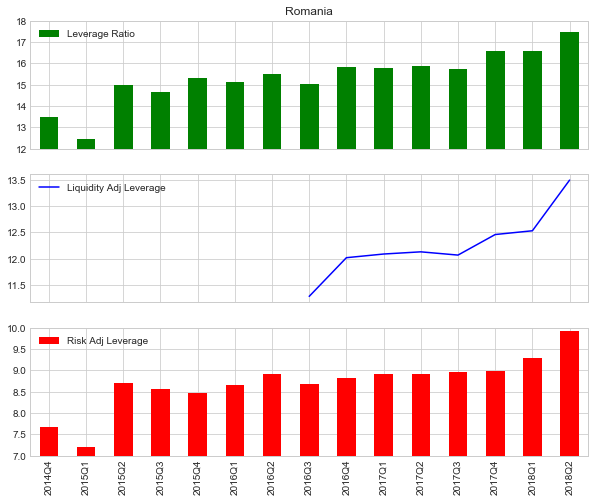

In [59]:
#Romania
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Romania',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

# Sweden

In [ ]:
country = table_maker('Sweden')
country

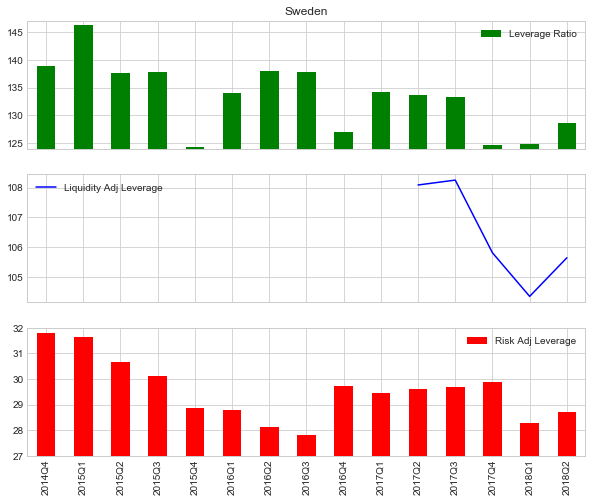

In [61]:
#Sweden 
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Sweden',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

**Sweden**

Like neighboring Finland, Sweden remains in the subset of countries that are still fairly highly levered. However, Sweden has seen a trend lower in overall bank leverage – especially on a risk adjusted basis.


# Slovenia

In [ ]:
country = table_maker('Slovenia')
country

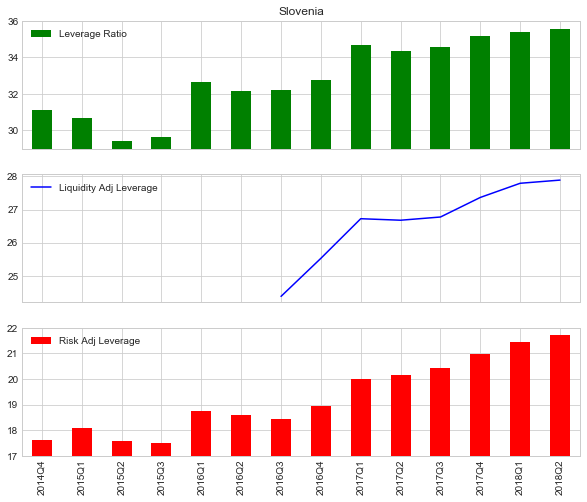

In [63]:
#Slovenia
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Slovenia',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

# Slovakia

In [ ]:
country = table_maker('Slovakia')
country

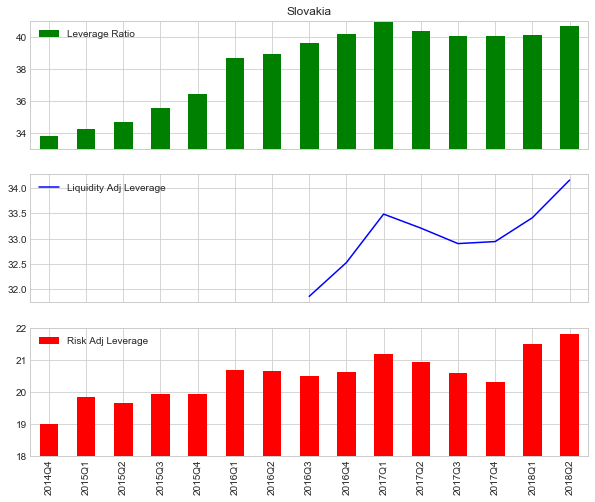

In [65]:
#Slovakia
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True , figsize=(10,8))
plt.style.use('seaborn-whitegrid')
country["Leverage Ratio"].plot.bar(title='Slovakia',legend = True, ax=ax[0], color='green' , ylim = [(round((min(country["Leverage Ratio"]))-.5)) , (round((max(country["Leverage Ratio"]))+.5))])
country['Liquidity Adj Leverage'].plot.line(legend = True, ax=ax[1], color='blue')
country['Risk Adj Leverage'].plot.bar(legend = True, ax=ax[2], color='red' , ylim = [(round((min(country['Risk Adj Leverage']))-.5)) , (round((max(country['Risk Adj Leverage']))+.5))])

For countries such as: Croatia; Lithuania; Luxemburg; Latvia; Malta; Romania; Slovenia; and Slovakia the trend is the same in that all have seen declining leverage. We did not expand further on these countries because of both the consistent trend amongst them and because - in the greater EU - they are small and low-impact countries.

*------------------------------------------------------------------------------------------------------------------*

It is clear that the greater EU banking system has de-levered broadly (though the picture might be a bit murkier than the one painted here because some countries keep this data confidential). We illustrated this trend both on an overall basis and a risk-adjusted basis. By looking at individual countries directly, we were able to observe a level of heterogeneity – which was clearly beneficial in a case like Greece, whose banking system evolved quite differently than the overall EU system over the past decade. On a case by case basis, and on an aggregate basis it is clear the EU is more resilient today to financial shocks than it was 10 years ago. However, this is not to say that the EU is invincible from financial disturbance. As is clearly demonstrated with recent events that have played out in Italy (fiscal irresponsibility and the denial of Italy’s budget proposal by the EU), the banking system is still vulnerable.

These recent events also exemplify the importance of the data presented above. If we assume there is some level of uncertainty that we can not define (we don’t know what the future holds and we can’t attempt to put probabilities on outcomes based on historical reference – the 2008 GFC is an example of why this is dangerous) then this data is equally important today as it was 10 years ago. If Italy’s current turmoil worsens, banks lie at the heart of transmitting that crisis across Europe (and the world). As illustrated in the data, most banks have a large enough capital cushion to protect them from shocks of the magnitude we have seen before. However, if Italy’s situation worsens (to point of possible exit from the EU) or a greater global shock occurs there still is some level of leverage – though less – in many of the major EU banking systems which could propagate the shock across the EU and the global economy. In other words, banking crises are less likely today as they were 10 years ago it is not to say that the possibility of a crisis is still prevalent. We’ve begun fixing the foundation of the building but there is certainly more room for improvements going forward.

# Appendix A 

As a means of illustrating the practicality of this data we decided it would be valuable to illustrates the relationship between our data and some financial data. We had discussed earlier the uniqueness of the Greece data and how it provided valuable insights independently, but Greece also presents an interesting opportunity to define the relationship between the health of the banking system and financial assets. As such, we gathered data on Greek government bonds and completed a basic regression to illustrates such a relationship. We looked specifically at broad capital ratios (the inverse of leverage - 1/Leverage) and 10-year yields. 

In [67]:
dt = '/Users/zacharycohen/Downloads/Greece Data (1).xlsx'
gd = pd.read_excel(dt)

In [68]:
gd = gd.rename(columns={'Capial Ratio':'capital_ratio', 'Greece 10 Year Yield': 'greece_10_year_yield'})

In [69]:
gd

,Date,capital_ratio,greece_10_year_yield
0,2018Q2,0.090564,4.240000
1,2018Q1,0.091206,4.066667
2,2017Q4,0.113177,5.083333
3,2017Q3,0.111073,5.480000
4,2017Q2,0.107132,6.106667
5,2017Q1,0.102531,7.243333
6,2016Q4,0.098779,7.533333
7,2016Q3,0.102681,8.173333
8,2016Q2,0.100111,8.196667
9,2016Q1,0.091431,9.536667


In [72]:
import statsmodels.formula.api as smf

In [73]:
print(smf.ols('greece_10_year_yield ~ capital_ratio',data=gd).fit().summary())

                             OLS Regression Results                             
Dep. Variable:     greece_10_year_yield   R-squared:                       0.616
Model:                              OLS   Adj. R-squared:                  0.600
Method:                   Least Squares   F-statistic:                     38.43
Date:                  Tue, 18 Dec 2018   Prob (F-statistic):           2.09e-06
Time:                          22:40:18   Log-Likelihood:                -65.404
No. Observations:                    26   AIC:                             134.8
Df Residuals:                        24   BIC:                             137.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.5942  

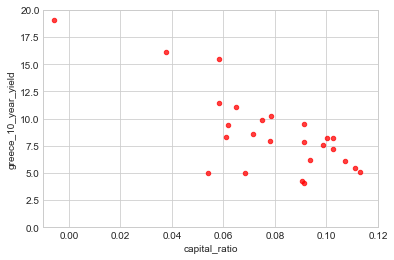

In [74]:
gd.plot.scatter(y='greece_10_year_yield',x='capital_ratio',alpha=.75, xlim=[-.01,.12], ylim=[0,20],color='red',)

It is clear from the regression that there is a negative relationship - meaning a higher levered and undercapitalized banking system is associated with significantly higher yields. (Defining which way the causality runs is a tricky issue - so we will leave that aside here.) This is what we would expect as a over-leveraged banking system poses risk to that respective countries economy, and is associated with a higher risk-premium (premium commanded by investors holding - now - riskier assets) and higher yields. We make the conclusion from here that - though this data should obviously not be used as the sole basis for an investment in certain countries - it is vital to keep this data in mind when formulating an investment idea - especially in Foreign Exchange, sovereign bonds and any other investment with a high beta (correlation) to the specific country's economy in which the money is being invested. 